In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import os
# ROOT.enableJSVis()
c1 = ROOT.TCanvas()
c1.SetWindowSize(600,600);
c1.SetCanvasSize(330,510);
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")

Welcome to JupyROOT 6.22/02


0

In [2]:
R_true = []
Z_true = []
Rrms = []
Zrms = []
folder = "/home/vasu/PPC/PPC_SigGen/arrays/60kev-right"
for file in os.listdir(folder):
    filepath = os.path.join(folder,file)
    f = open(filepath,'r')
    line = f.readline()
    while (line != ''):
        line = line.strip("\n").split("\t")
        R_true.append(int(line[0]))
        Rrms.append(float(line[1]))
        Z_true.append(int(line[2]))
        Zrms.append(float(line[3]))
        line = f.readline()
    f.close()

In [3]:
# print len(Rrms)

In [4]:
hrRMS = ROOT.TH2F("hrRMS","hrRMS",33,0,33,51,0,51)
hzRMS = ROOT.TH2F("hzRMS","hzRMS",33,0,33,51,0,51)
hrRMS.GetXaxis().SetTitle("R")
hrRMS.GetYaxis().SetTitle("Z")
hzRMS.GetXaxis().SetTitle("R")
hzRMS.GetYaxis().SetTitle("Z")
h1XR = hrRMS.GetXaxis().GetBinWidth(1)
h2YR = hrRMS.GetYaxis().GetBinWidth(1)
h1XZ = hzRMS.GetXaxis().GetBinWidth(1)
h2YZ = hzRMS.GetYaxis().GetBinWidth(1)

for i in range (len(R_true)):
    hrRMS.SetBinContent(int(R_true[i]/h1XR),int(Z_true[i]/h2YR),Rrms[i])
    hzRMS.SetBinContent(int(R_true[i]/h1XZ),int(Z_true[i]/h2YZ),Zrms[i])
# hrRMS.SetBinContent(4,9,0.0420370075053)
# hzRMS.SetBinContent(4,9,0.0258516924011)

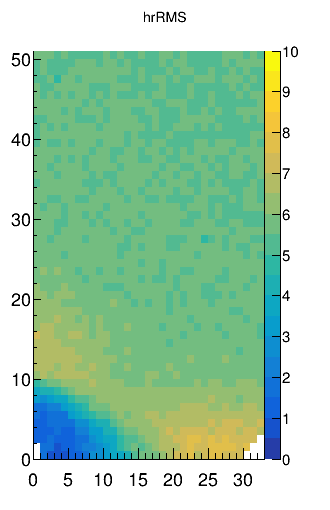

In [5]:
hrRMS.Draw("colz")
hrRMS.SetMaximum(10)
hrRMS.SetMinimum(0)
hrRMS.GetXaxis().SetLabelSize(0.06)
hrRMS.GetYaxis().SetLabelSize(0.06)
hrRMS.GetXaxis().SetTitleSize(444)
hrRMS.GetYaxis().SetTitleSize(444)
hrRMS.GetZaxis().SetLabelSize(0.05)
hrRMS.SetStats(0)
c1.SetRightMargin(0.2)
c1.Draw()

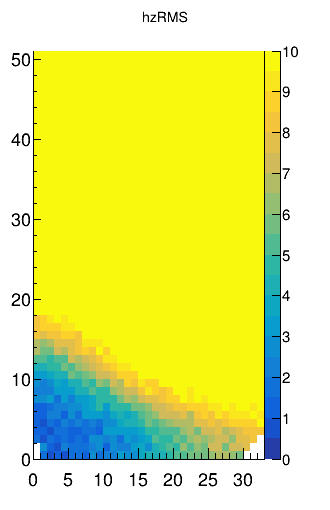

In [6]:
hzRMS.Draw("colz")
hzRMS.SetMaximum(10)
hzRMS.SetMinimum(0)
hzRMS.GetXaxis().SetLabelSize(0.06)
hzRMS.GetYaxis().SetLabelSize(0.06)
hzRMS.GetXaxis().SetTitleSize(444)
hzRMS.GetYaxis().SetTitleSize(444)
hzRMS.GetZaxis().SetLabelSize(0.05)
hzRMS.SetStats(0)
c1.SetRightMargin(0.2)
c1.Draw()